A notebook for processing images acquired with the OROCHI simulator to reflectance, with coalignment by stereo geometric calibration.

Processing of Experiments performed on 26/04/2023

- Reflectance Calibration
- Geometric Calibration
- Sample 1
- Sample 2
- Sample 3
- Sample 4 (failed)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

The steps of processing are:
1. Calibration Preparation:
    - Load, average and bias correct Calibration Target images
    - Correct for exposure
    - Load reference reflectance for each channel
    - Scale images to give reflectance calibration coefficient for each pixel
    - Optional: mask for Calibration Target
    - Save reflectance calibration images
3. Geometric Calibration
    - Load, average and bias correct Geometric images
    - Balance images (TBD)
    - Extract camera geometric calibration coefficients (TBD)    
2. Sample Reflectance Calibration and Coalignment
    - Load, average and bias correct Sample images
    - Correct for exposure
    - Apply calibration coefficient frames
    - Optional: mask for Calibration Target area and Sample area.
    - Save reflectance images
    - Apply geometric coalignment
    - Save coaligned images over Region of Interest


# Setup

In [2]:
import orochi_sim_proc as osp

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_ctrl.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


# Calibration Preparation
For each channel:
- Load, average and bias correct Calibration Target images
- Correct for exposure
- Load reference reflectance for each channel
- Scale images to give reflectance calibration coefficient for each pixel
- Optional: mask for Calibration Target
- Save reflectance calibration images

Loading Calibration Target for: 0 (650 nm)
Loading Calibration Target for: 1 (475 nm)
Loading Calibration Target for: 3 (400 nm)
Loading Calibration Target for: 4 (725 nm)
Loading Calibration Target for: 5 (850 nm)
Loading Calibration Target for: 6 (550 nm)
Loading Calibration Target for: 7 (950 nm)


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:767: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:338: RuntimeWarning: divide by zero encountered in divide
  self.img_stk = self.reference_reflectance / self.img_stk
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:339: RuntimeWarning: divide by zero encountered in divide
  self.img_ave = self.reference_reflectance / self.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:340: RuntimeWarning: divide by zero encountered in divide
  lght_err = self.img_std/lst_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:340: RuntimeWarning: invalid value encountered in divide
  lght_err = self.img_std/lst_ave


Finding Reflectance Correction for: 0 (650 nm)
Finding Reflectance Correction for: 1 (475 nm)
Finding Reflectance Correction for: 3 (400 nm)
Finding Reflectance Correction for: 4 (725 nm)
Finding Reflectance Correction for: 5 (850 nm)
Finding Reflectance Correction for: 6 (550 nm)
Finding Reflectance Correction for: 7 (950 nm)


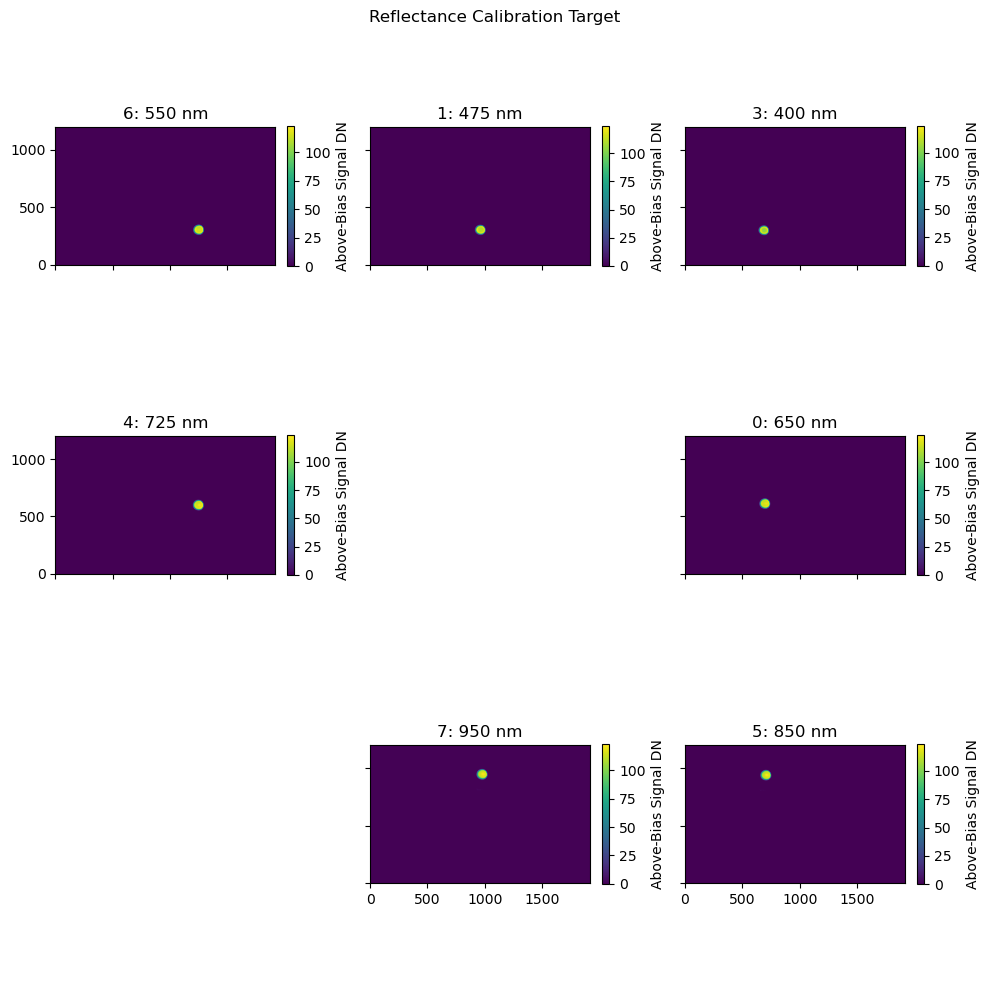

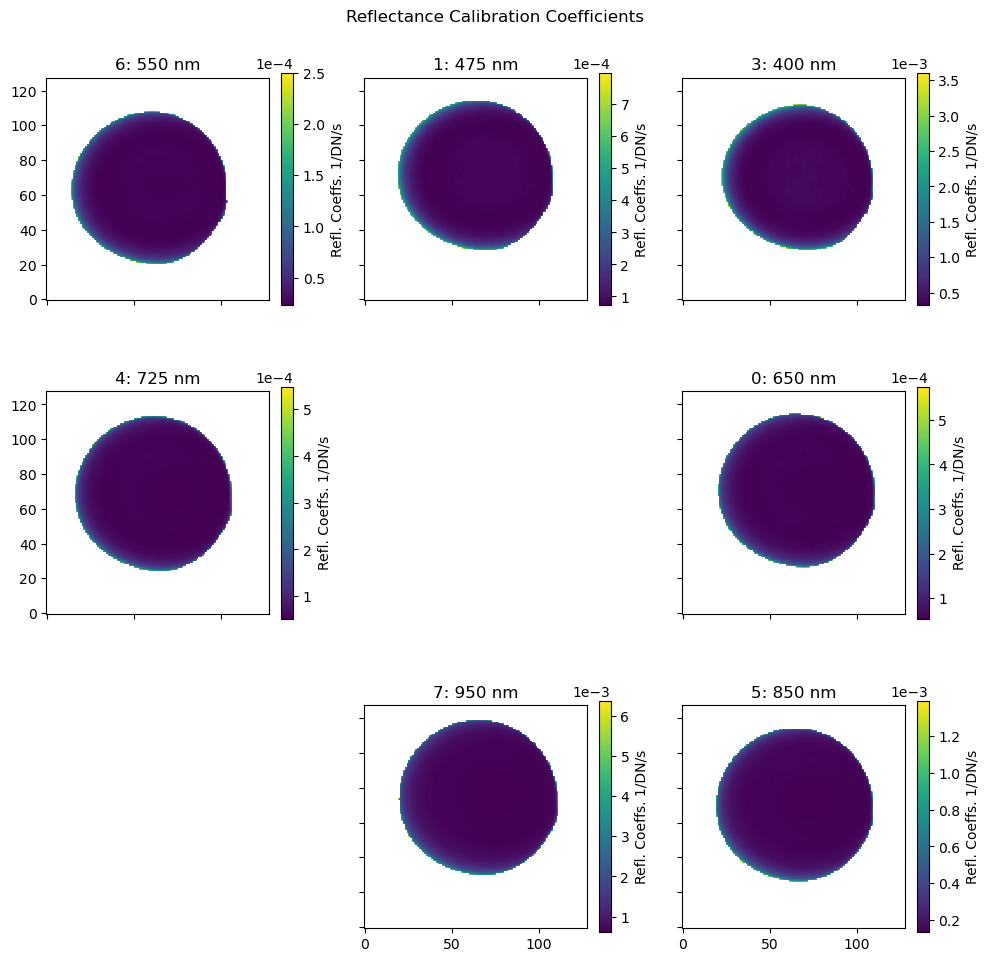

In [3]:
cali_imgs = osp.load_reflectance_calibration('reflectance_calibration')
cali_coeffs = osp.calibrate_reflectance(cali_imgs)


# Homography Calibration

Here we attempt to co-align images by finding the homography matrix between images of the calibration target cap writing.

- Load, average and bias correct geometric images
- choose destination/base image
- for each channel, find homography matrix mapping from channel/source to base
- apply image transformation for each channel.

Load the images of the geometric calibration target, and calibrate the homography matrices.

Loading Geometric Target for: 0 (650.0 nm)
Loading Geometric Target for: 1 (475.0 nm)
Loading Geometric Target for: 3 (400.0 nm)
Loading Geometric Target for: 4 (725.0 nm)
Loading Geometric Target for: 5 (850.0 nm)
Loading Geometric Target for: 6 (550.0 nm)
Loading Geometric Target for: 7 (950.0 nm)
Calibrating Homography for: 0 (650.0 nm)
...426 source points found
...426 destination points found
...340 matches found
Calibrating Homography for: 1 (475.0 nm)
...415 source points found
...426 destination points found
...332 matches found
Calibrating Homography for: 3 (400.0 nm)
...403 source points found
...426 destination points found
...322 matches found


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:551: RuntimeWarning: invalid value encountered in divide
  err = ax.imshow(np.abs(query_reg-train_img)/train_img, origin='lower')
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:551: RuntimeWarning: divide by zero encountered in divide
  err = ax.imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


Calibrating Homography for: 4 (725.0 nm)
...417 source points found
...426 destination points found
...333 matches found
Calibrating Homography for: 5 (850.0 nm)
...420 source points found
...426 destination points found
...336 matches found
Calibrating Homography for: 6 (550.0 nm)
...420 source points found
...426 destination points found
...336 matches found
Calibrating Homography for: 7 (950.0 nm)
...397 source points found
...426 destination points found
...317 matches found


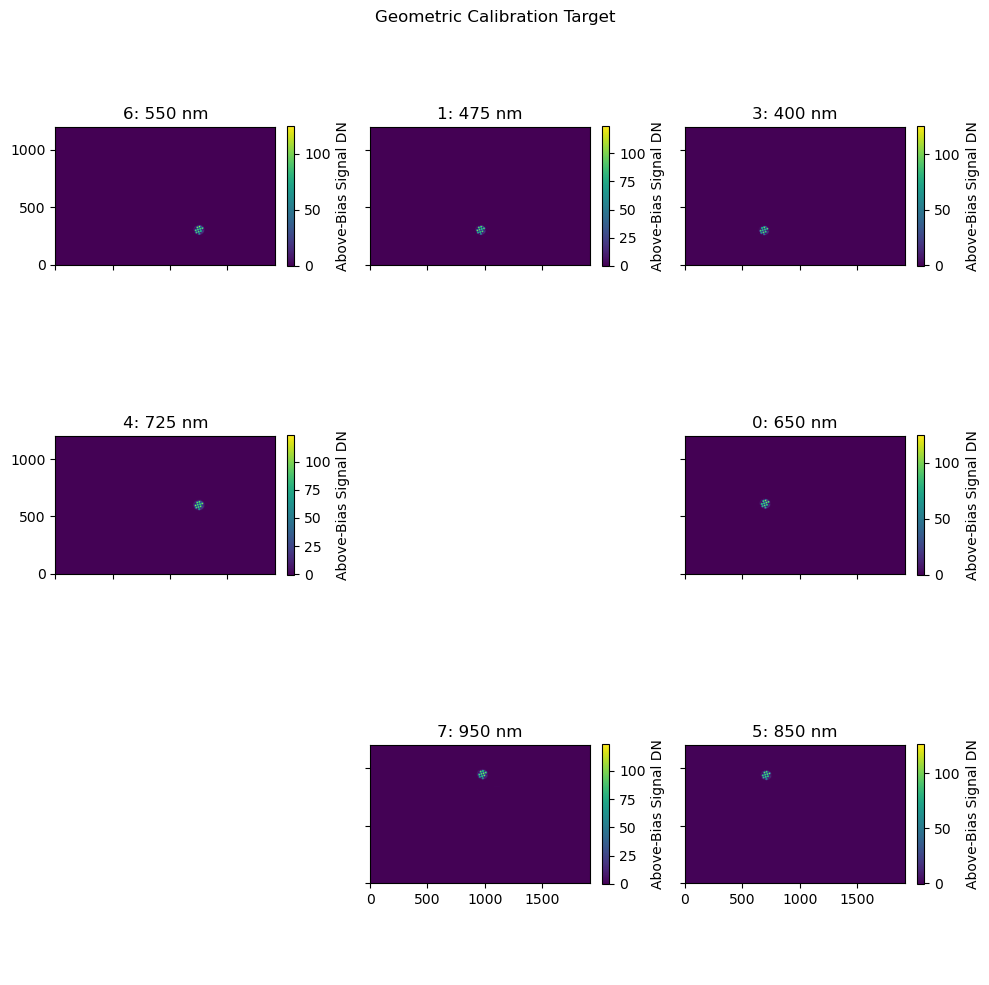

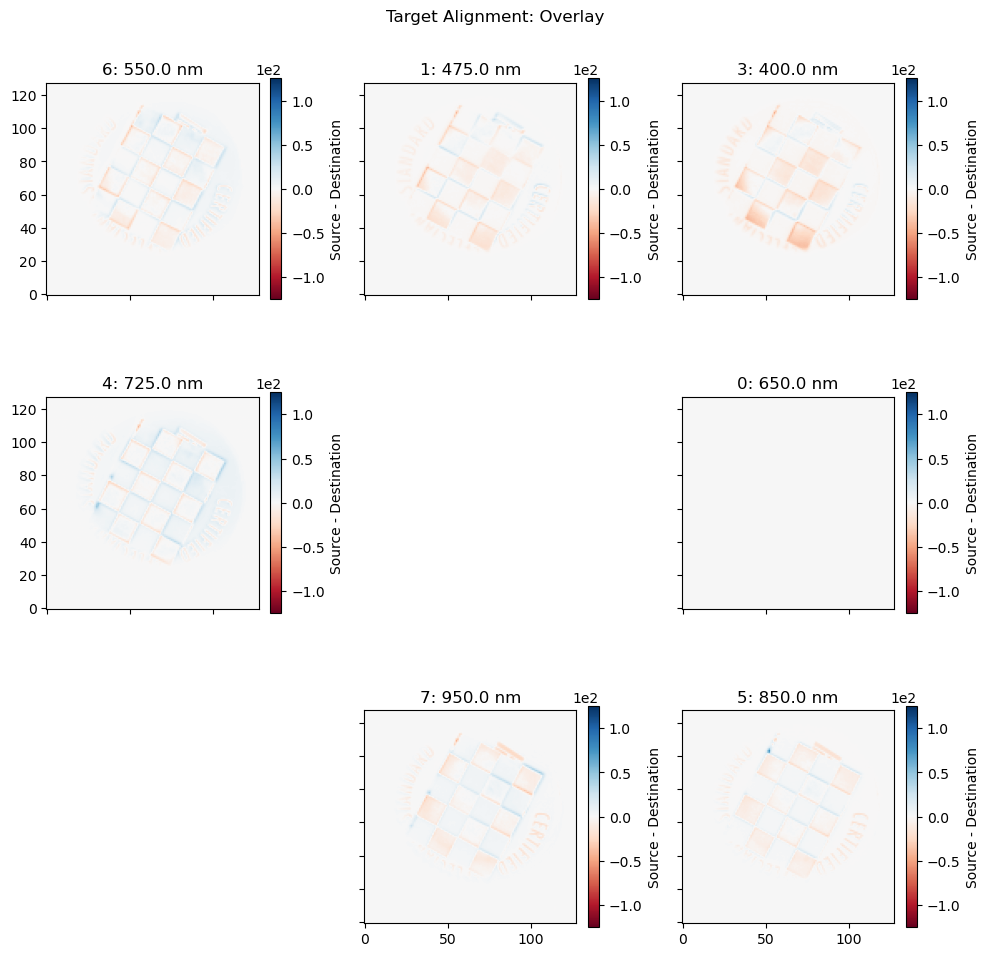

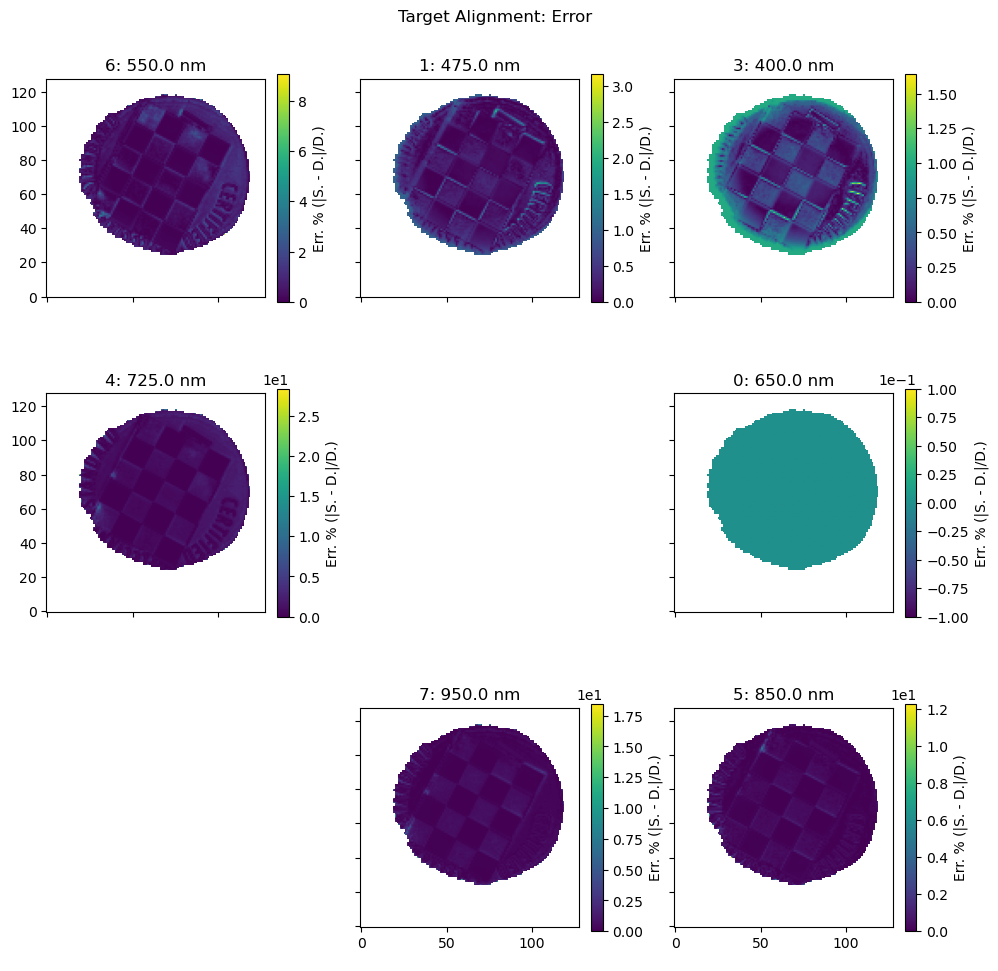

In [4]:
geocs = osp.load_geometric_calibration('geometric_calibration')
coals = osp.calibrate_homography(geocs)

# Sample Reflectance Calibration and Coalignment
- Load, average and bias correct Sample images
- Correct for exposure
- Apply calibration coefficient frames
- Optional: mask for Calibration Target area and Sample area.
- Save reflectance images

## Checking against the calibration target

- expect to be near 1, but not exactly 1

Loading reflectance_calibration: 0 (650 nm)
Loading reflectance_calibration: 1 (475 nm)
Loading reflectance_calibration: 3 (400 nm)
Loading reflectance_calibration: 4 (725 nm)
Loading reflectance_calibration: 5 (850 nm)
Loading reflectance_calibration: 6 (550 nm)
Loading reflectance_calibration: 7 (950 nm)


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:377: RuntimeWarning: invalid value encountered in multiply
  self.img_ave = self.img_ave * cali_source.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:379: RuntimeWarning: invalid value encountered in divide
  lght_err = self.img_std/lst_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:380: RuntimeWarning: invalid value encountered in divide
  cali_err = cali_source.img_std/cali_source.img_ave


../data/reflectance_calibration/0_650
Mean image written to ../data/reflectance_calibration/0_650/650_mean_rfl.tif
Error image written to ../data/reflectance_calibration/0_650/650_error_rfl.tif
../data/reflectance_calibration/1_475
Mean image written to ../data/reflectance_calibration/1_475/475_mean_rfl.tif
Error image written to ../data/reflectance_calibration/1_475/475_error_rfl.tif
../data/reflectance_calibration/3_400
Mean image written to ../data/reflectance_calibration/3_400/400_mean_rfl.tif
Error image written to ../data/reflectance_calibration/3_400/400_error_rfl.tif
../data/reflectance_calibration/4_725
Mean image written to ../data/reflectance_calibration/4_725/725_mean_rfl.tif
Error image written to ../data/reflectance_calibration/4_725/725_error_rfl.tif
../data/reflectance_calibration/5_850
Mean image written to ../data/reflectance_calibration/5_850/850_mean_rfl.tif
Error image written to ../data/reflectance_calibration/5_850/850_error_rfl.tif
../data/reflectance_calibratio

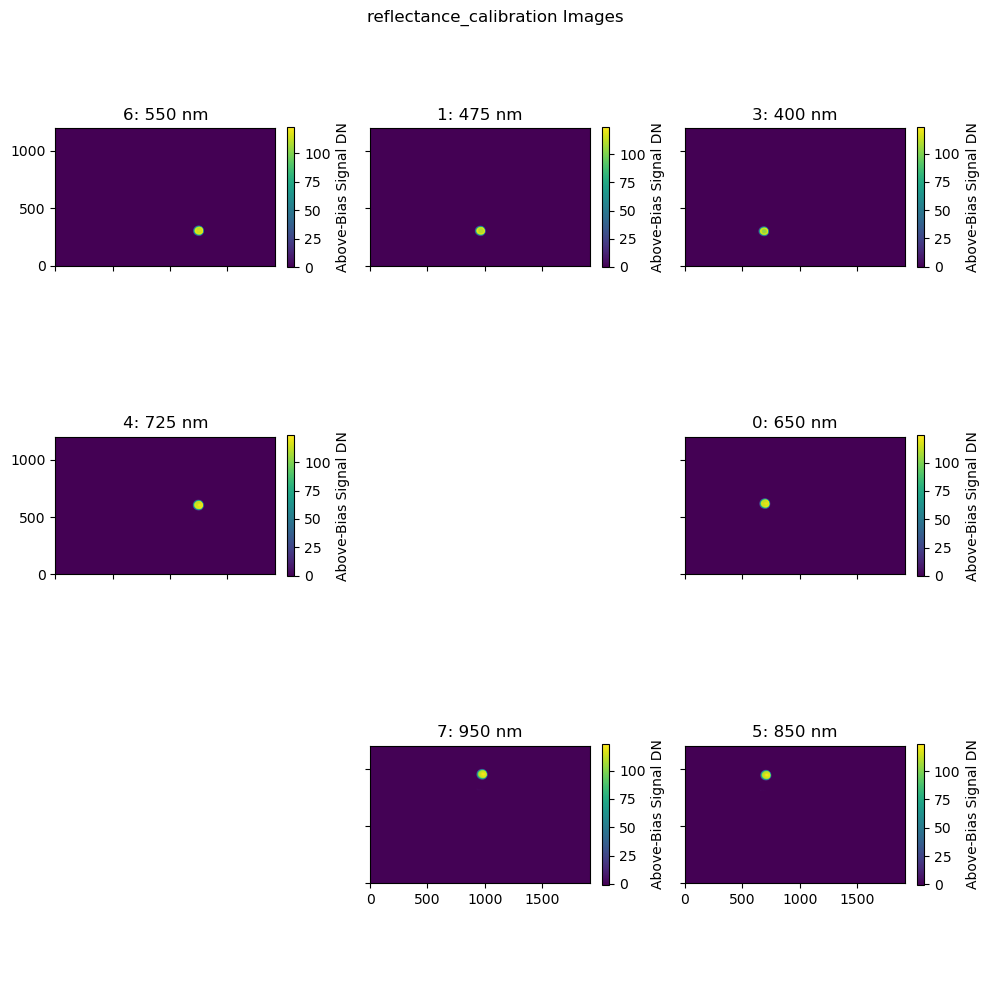

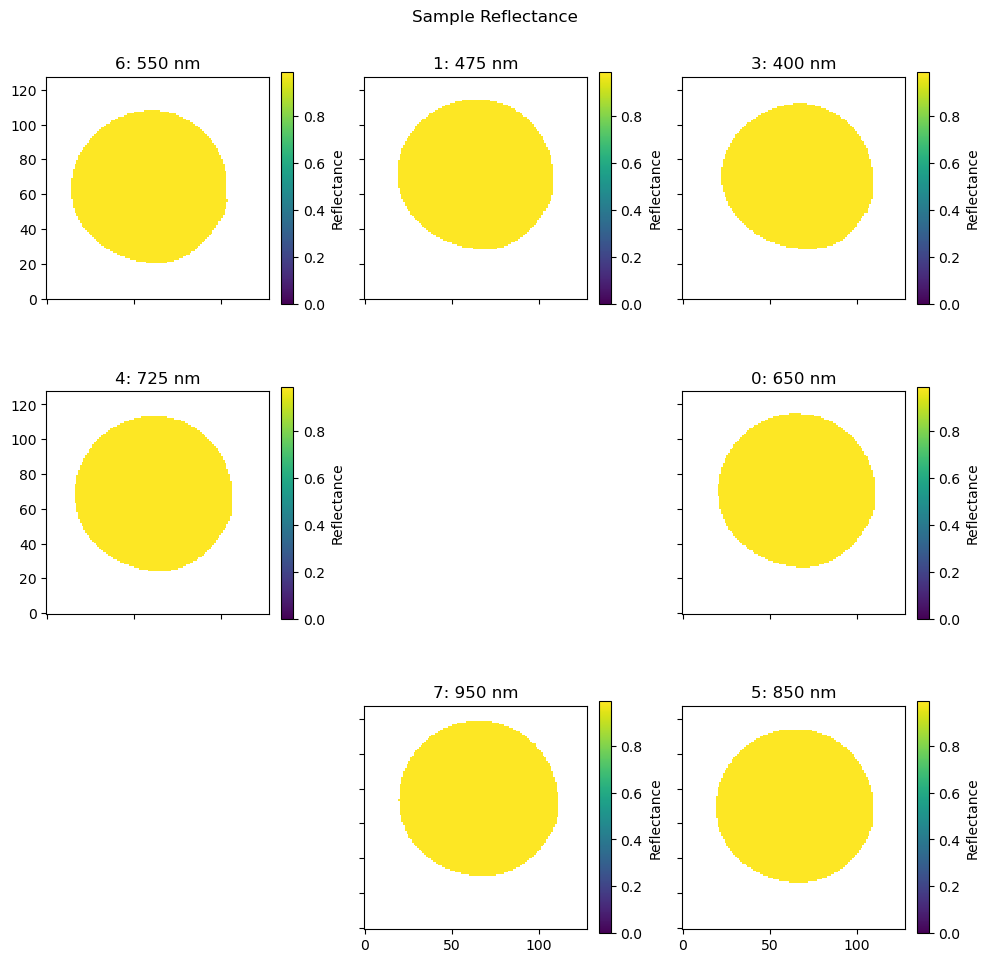

In [5]:
smpl_imgs = osp.load_sample('reflectance_calibration')
reflectance = osp.apply_reflectance_calibration(smpl_imgs, cali_coeffs)

## Sample 1

### Reflectance Calibration

Loading sample_1: 0 (650 nm)
Loading sample_1: 1 (475 nm)
Loading sample_1: 3 (400 nm)
Loading sample_1: 4 (725 nm)
Loading sample_1: 5 (850 nm)
Loading sample_1: 6 (550 nm)
Loading sample_1: 7 (950 nm)
../data/sample_1/0_650
Mean image written to ../data/sample_1/0_650/650_mean_rfl.tif
Error image written to ../data/sample_1/0_650/650_error_rfl.tif
../data/sample_1/1_475
Mean image written to ../data/sample_1/1_475/475_mean_rfl.tif
Error image written to ../data/sample_1/1_475/475_error_rfl.tif
../data/sample_1/3_400
Mean image written to ../data/sample_1/3_400/400_mean_rfl.tif
Error image written to ../data/sample_1/3_400/400_error_rfl.tif
../data/sample_1/4_725
Mean image written to ../data/sample_1/4_725/725_mean_rfl.tif
Error image written to ../data/sample_1/4_725/725_error_rfl.tif
../data/sample_1/5_850
Mean image written to ../data/sample_1/5_850/850_mean_rfl.tif
Error image written to ../data/sample_1/5_850/850_error_rfl.tif
../data/sample_1/6_550
Mean image written to ../data

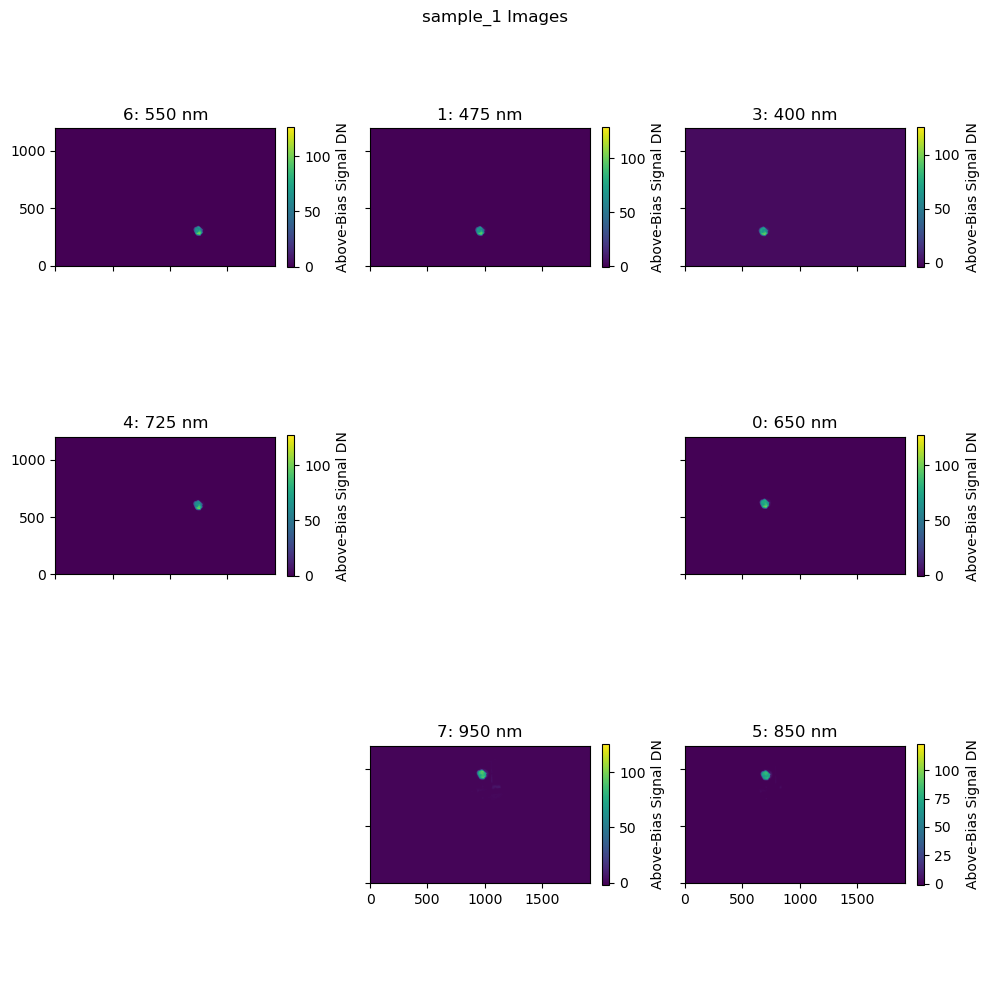

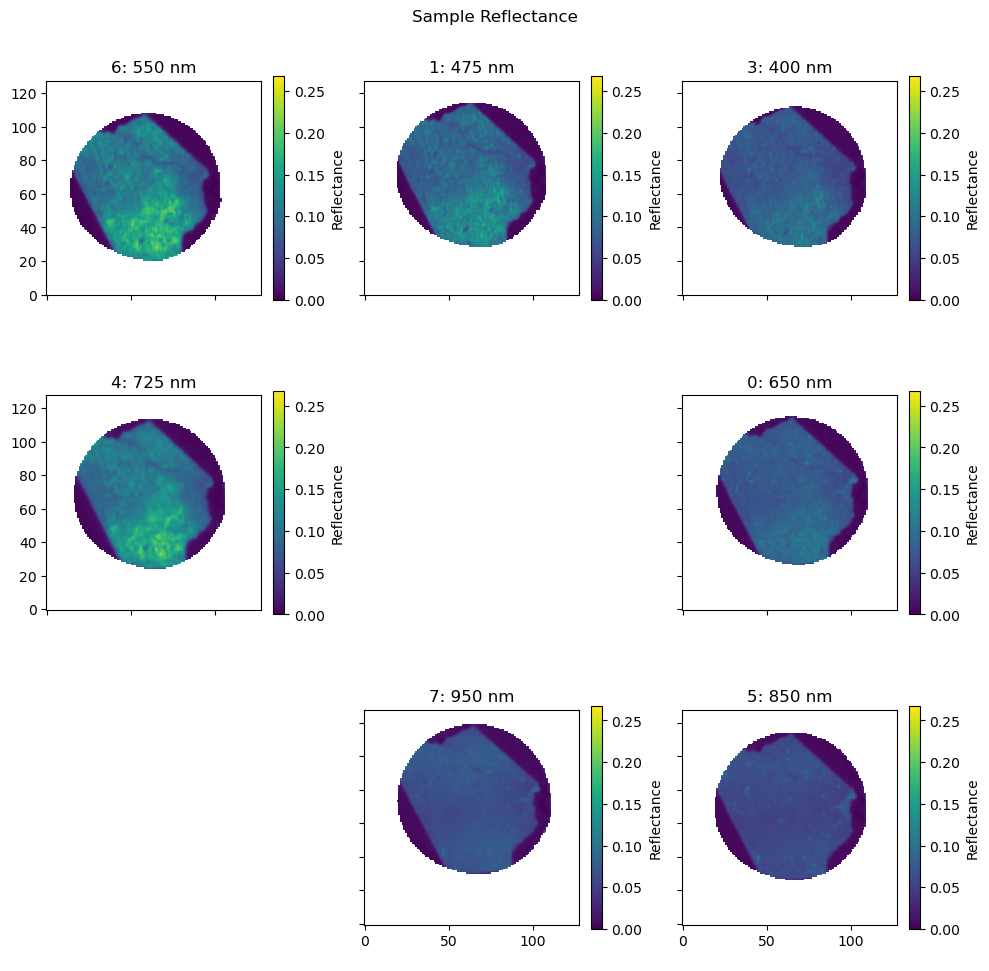

In [6]:
smpl_imgs = osp.load_sample('sample_1')
reflectance = osp.apply_reflectance_calibration(smpl_imgs, cali_coeffs)

### Geometric Alignment

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:547: RuntimeWarning: invalid value encountered in subtract
  src = ax.imshow(query_reg-train_img, cmap='RdBu', origin='lower', vmin=-col_max, vmax=col_max)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:551: RuntimeWarning: invalid value encountered in subtract
  err = ax.imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


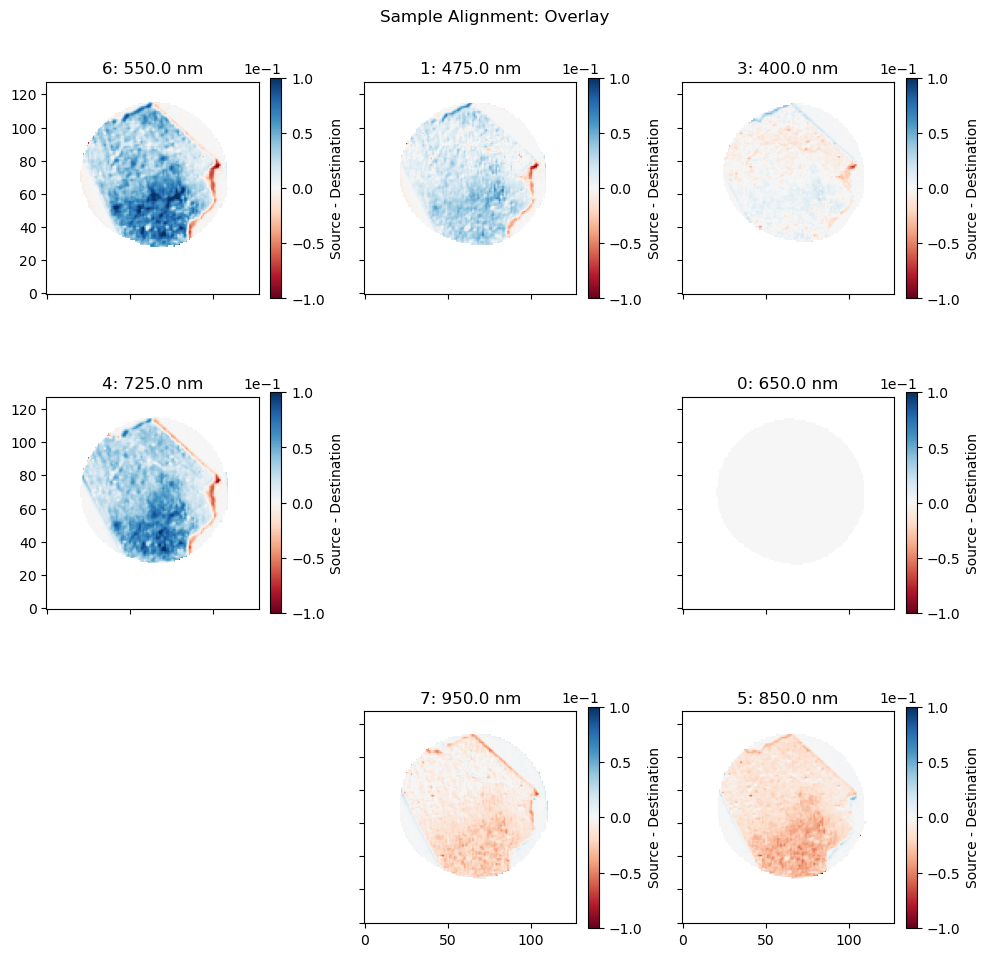

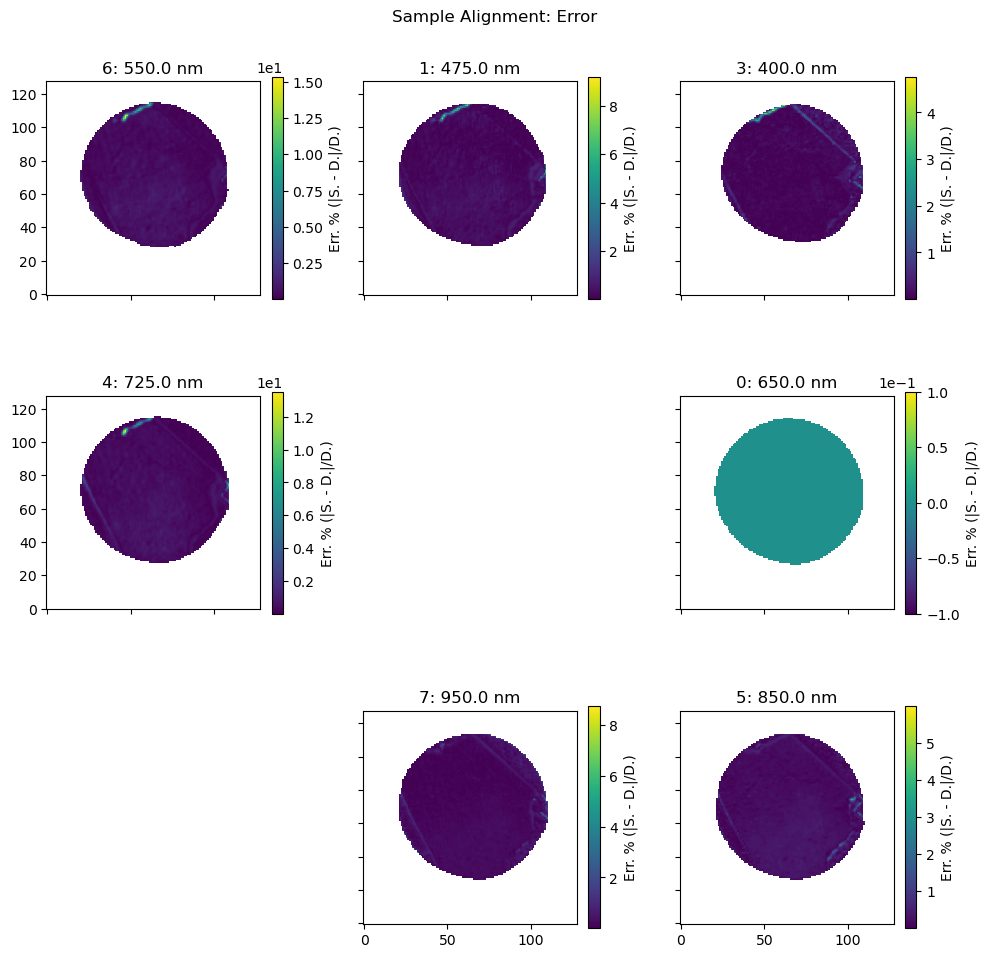

In [7]:
aligned_refl = osp.apply_coalignment(reflectance, coals)

### Reflectance ROI Selection and Plotting

/opt/homebrew/Caskroom/miniconda/base/envs/orochi_sim_ctrl/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydev_ipython/qt_loaders.py:109: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:767: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


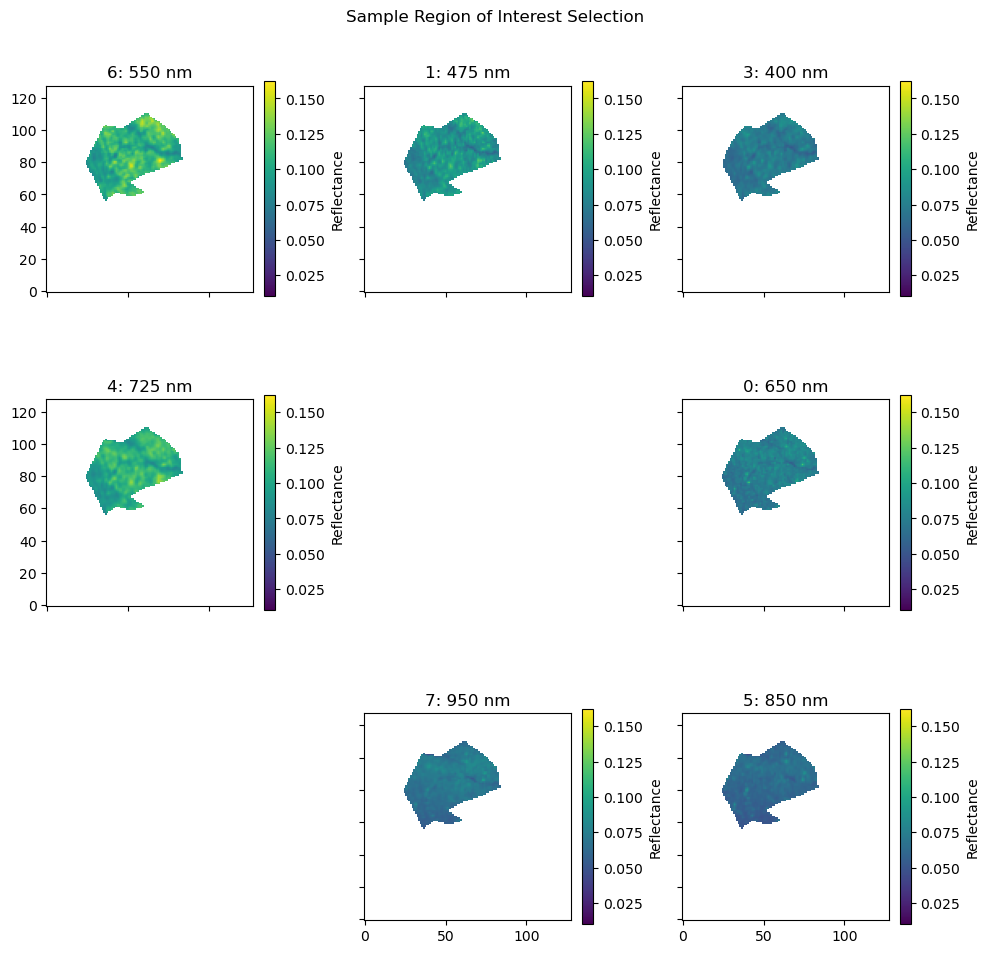

In [11]:
aligned_refl_rois = osp.set_roi(aligned_refl, base_channel='6_550')

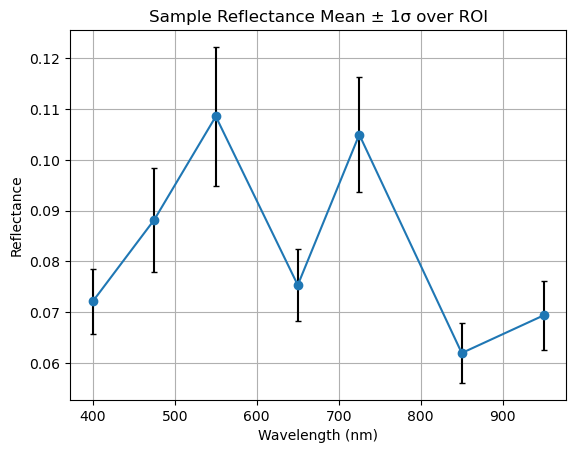

In [23]:
results = osp.plot_roi_reflectance(refl_imgs=aligned_refl_rois)

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:386: RuntimeWarning: divide by zero encountered in divide
  self.img_ave = self.img_ave / base.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:386: RuntimeWarning: invalid value encountered in divide
  self.img_ave = self.img_ave / base.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:767: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


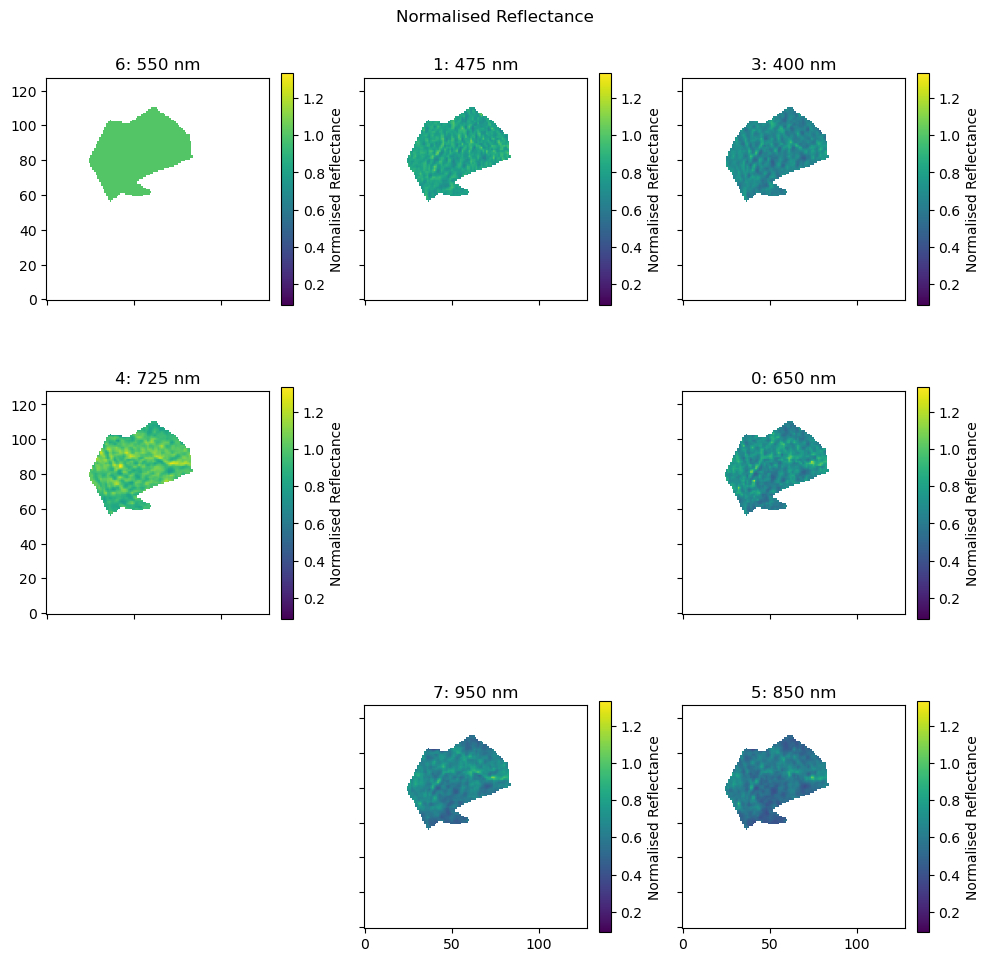

In [13]:
norm_refl = osp.normalise_reflectance(aligned_refl)

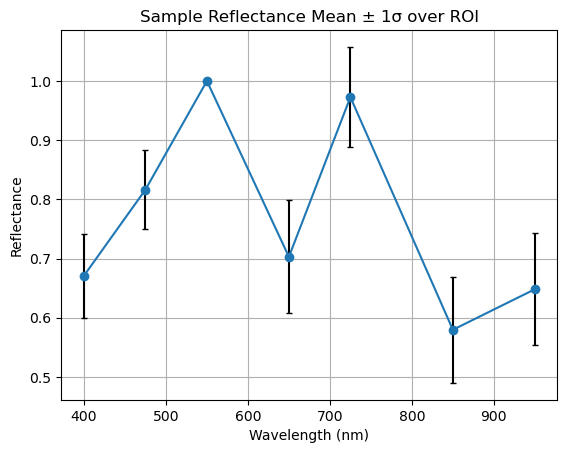

In [22]:
results = osp.plot_roi_reflectance(refl_imgs=norm_refl)

## Sample 3

### Reflectance Calibration

Loading sample_3: 0 (650 nm)
Loading sample_3: 1 (475 nm)
Loading sample_3: 3 (400 nm)
Loading sample_3: 4 (725 nm)
Loading sample_3: 5 (850 nm)
Loading sample_3: 6 (550 nm)
Loading sample_3: 7 (950 nm)


/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:767: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:377: RuntimeWarning: invalid value encountered in multiply
  self.img_ave = self.img_ave * cali_source.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:379: RuntimeWarning: invalid value encountered in divide
  lght_err = self.img_std/lst_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:380: RuntimeWarning: invalid value encountered in divide
  cali_err = cali_source.img_std/cali_source.img_ave


../data/sample_3/0_650
Mean image written to ../data/sample_3/0_650/650_mean_rfl.tif
Error image written to ../data/sample_3/0_650/650_error_rfl.tif
../data/sample_3/1_475
Mean image written to ../data/sample_3/1_475/475_mean_rfl.tif
Error image written to ../data/sample_3/1_475/475_error_rfl.tif
../data/sample_3/3_400
Mean image written to ../data/sample_3/3_400/400_mean_rfl.tif
Error image written to ../data/sample_3/3_400/400_error_rfl.tif
../data/sample_3/4_725
Mean image written to ../data/sample_3/4_725/725_mean_rfl.tif
Error image written to ../data/sample_3/4_725/725_error_rfl.tif
../data/sample_3/5_850
Mean image written to ../data/sample_3/5_850/850_mean_rfl.tif
Error image written to ../data/sample_3/5_850/850_error_rfl.tif
../data/sample_3/6_550
Mean image written to ../data/sample_3/6_550/550_mean_rfl.tif
Error image written to ../data/sample_3/6_550/550_error_rfl.tif
../data/sample_3/7_950
Mean image written to ../data/sample_3/7_950/950_mean_rfl.tif
Error image written t

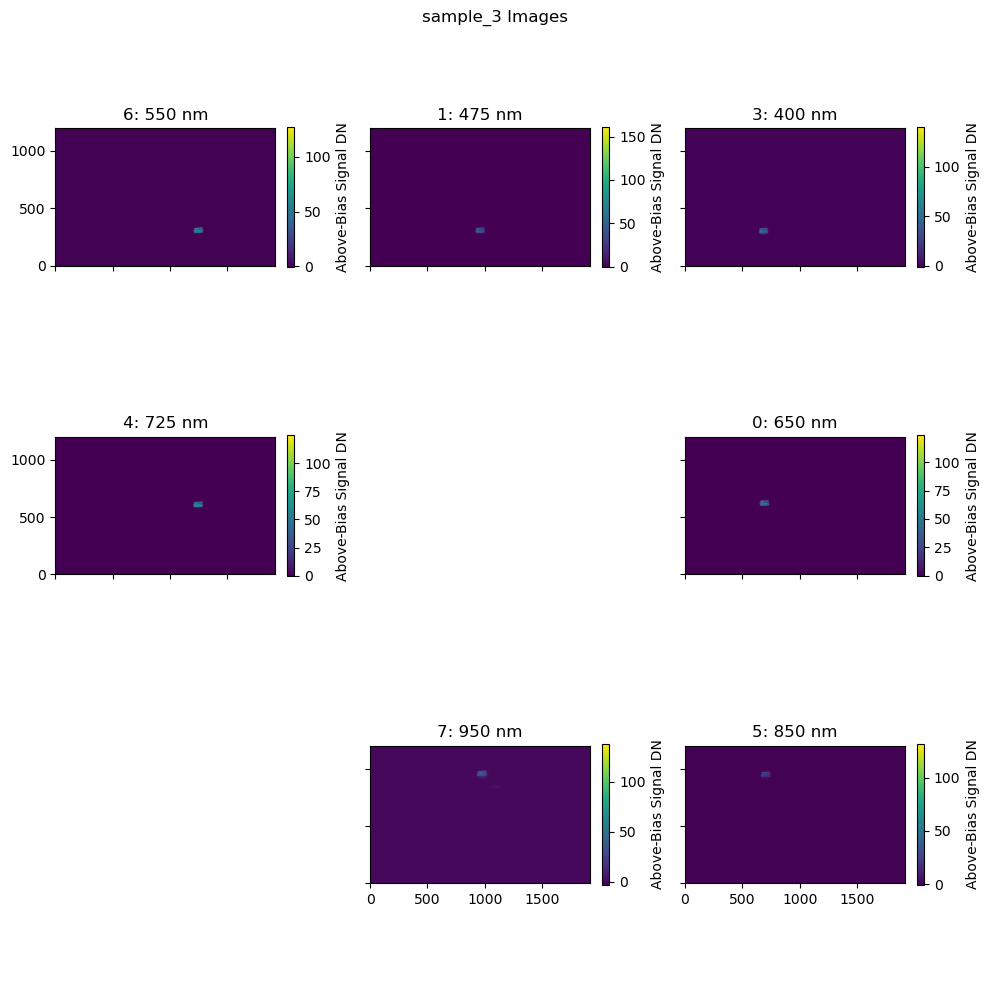

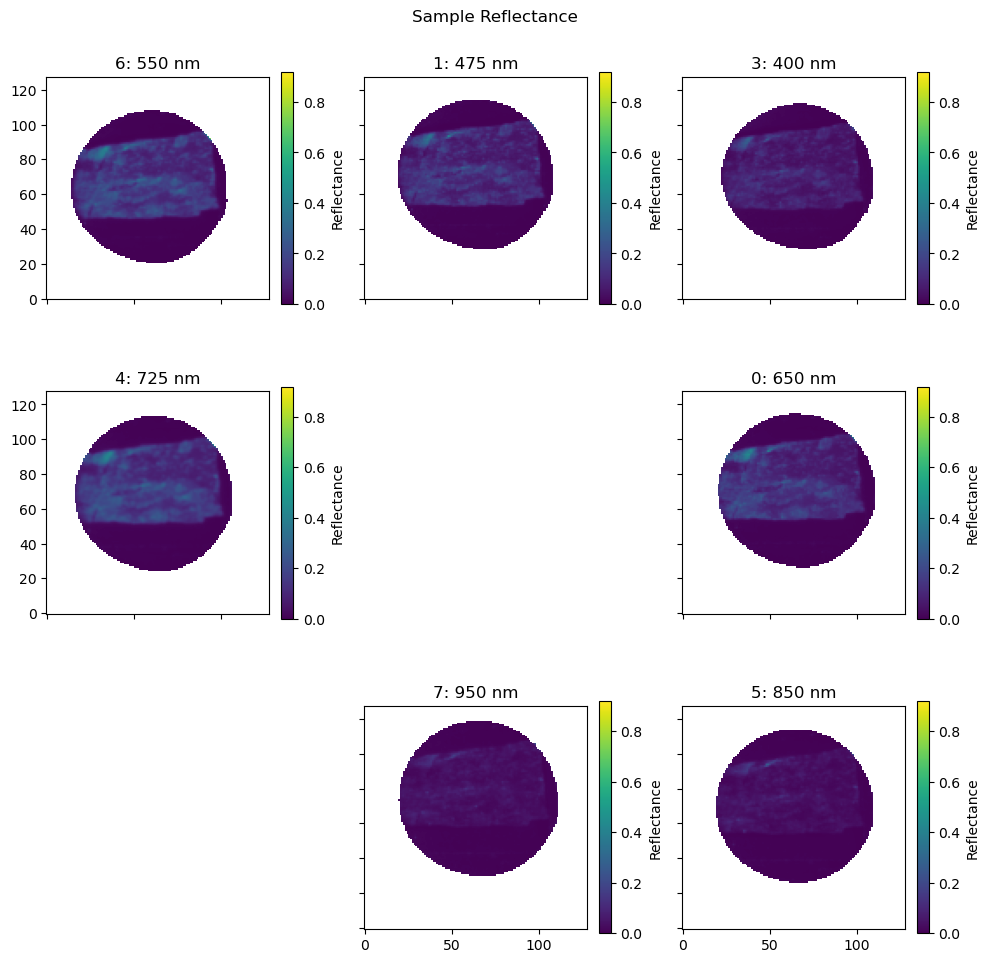

In [24]:
smpl_imgs = osp.load_sample('sample_3')
reflectance = osp.apply_reflectance_calibration(smpl_imgs, cali_coeffs)

### Geometric Alignment

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:547: RuntimeWarning: invalid value encountered in subtract
  src = ax.imshow(query_reg-train_img, cmap='RdBu', origin='lower', vmin=-col_max, vmax=col_max)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:551: RuntimeWarning: invalid value encountered in subtract
  err = ax.imshow(np.abs(query_reg-train_img)/train_img, origin='lower')
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:551: RuntimeWarning: invalid value encountered in divide
  err = ax.imshow(np.abs(query_reg-train_img)/train_img, origin='lower')
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:551: RuntimeWarning: divide by zero encountered in divide
  err = ax.imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


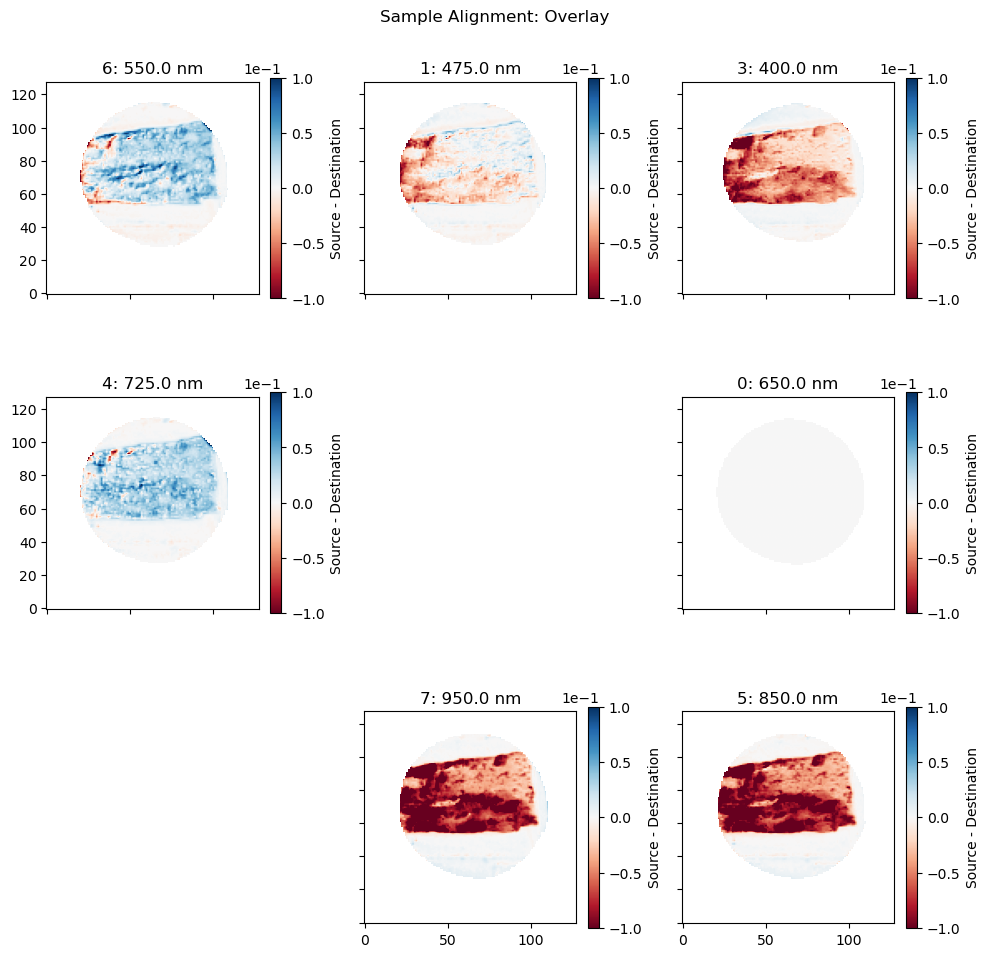

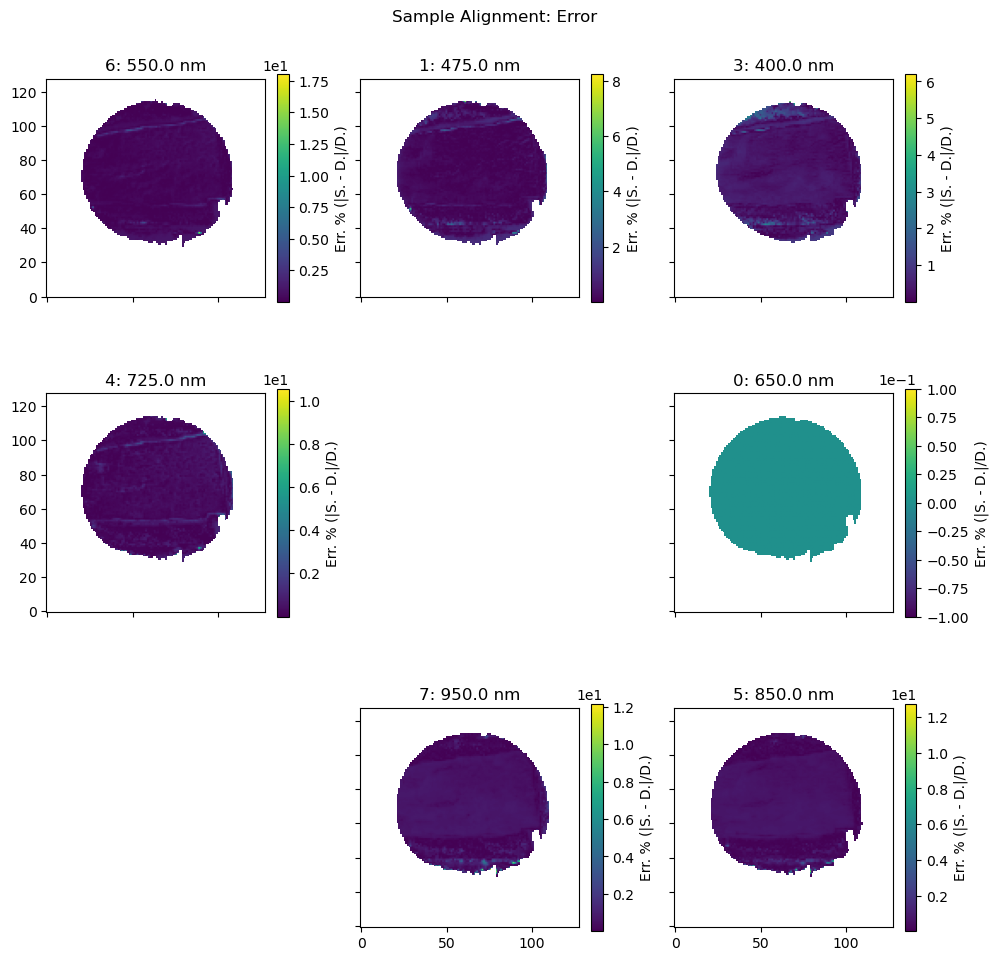

In [25]:
aligned_refl = osp.apply_coalignment(reflectance, coals)

### Reflectance ROI Selection and Plotting

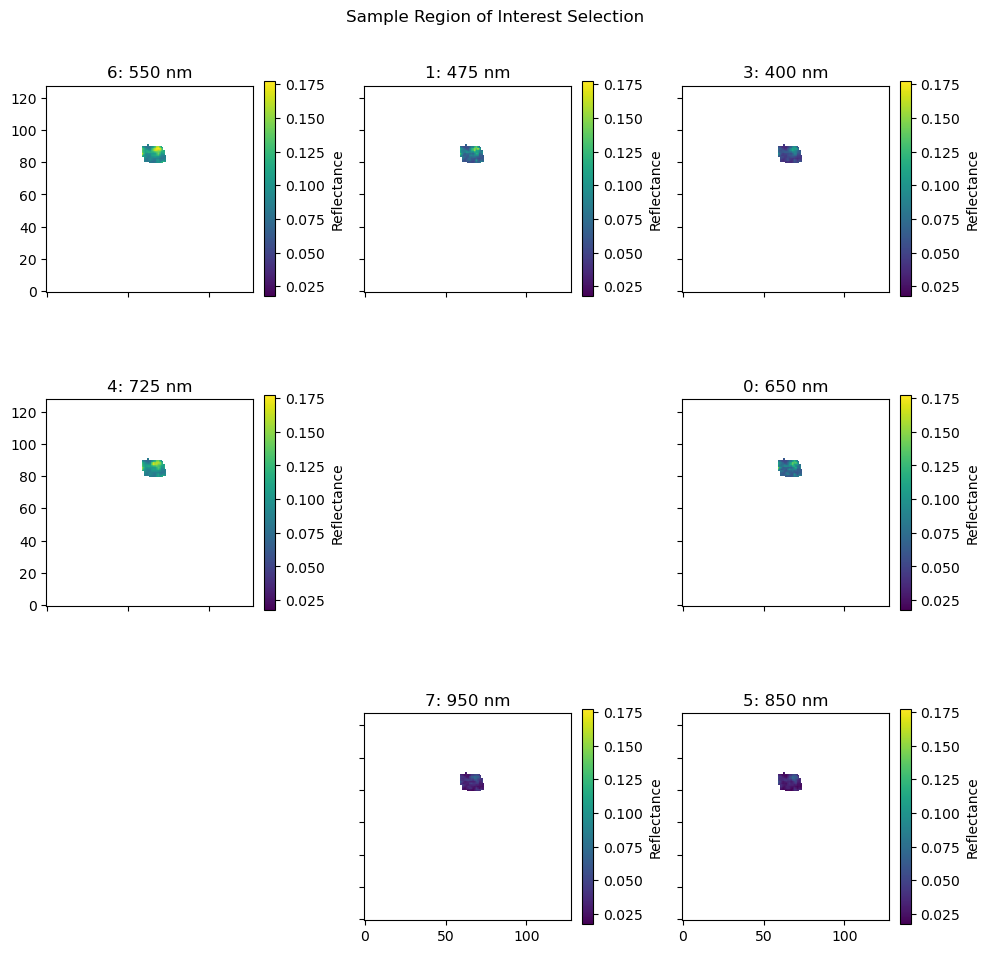

In [26]:
aligned_refl_rois = osp.set_roi(aligned_refl, base_channel='6_550')

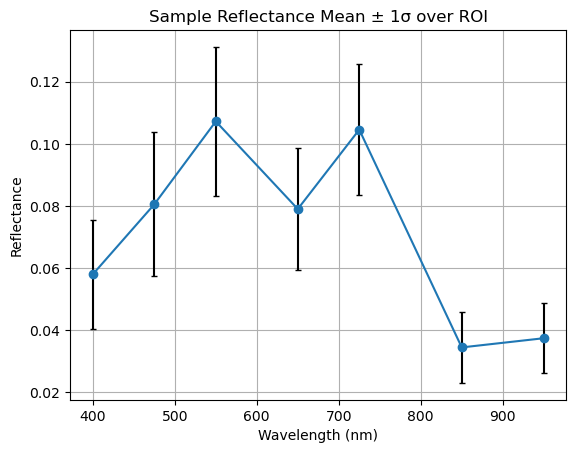

In [27]:
results = osp.plot_roi_reflectance(refl_imgs=aligned_refl_rois)

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:386: RuntimeWarning: divide by zero encountered in divide
  self.img_ave = self.img_ave / base.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:386: RuntimeWarning: invalid value encountered in divide
  self.img_ave = self.img_ave / base.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:767: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


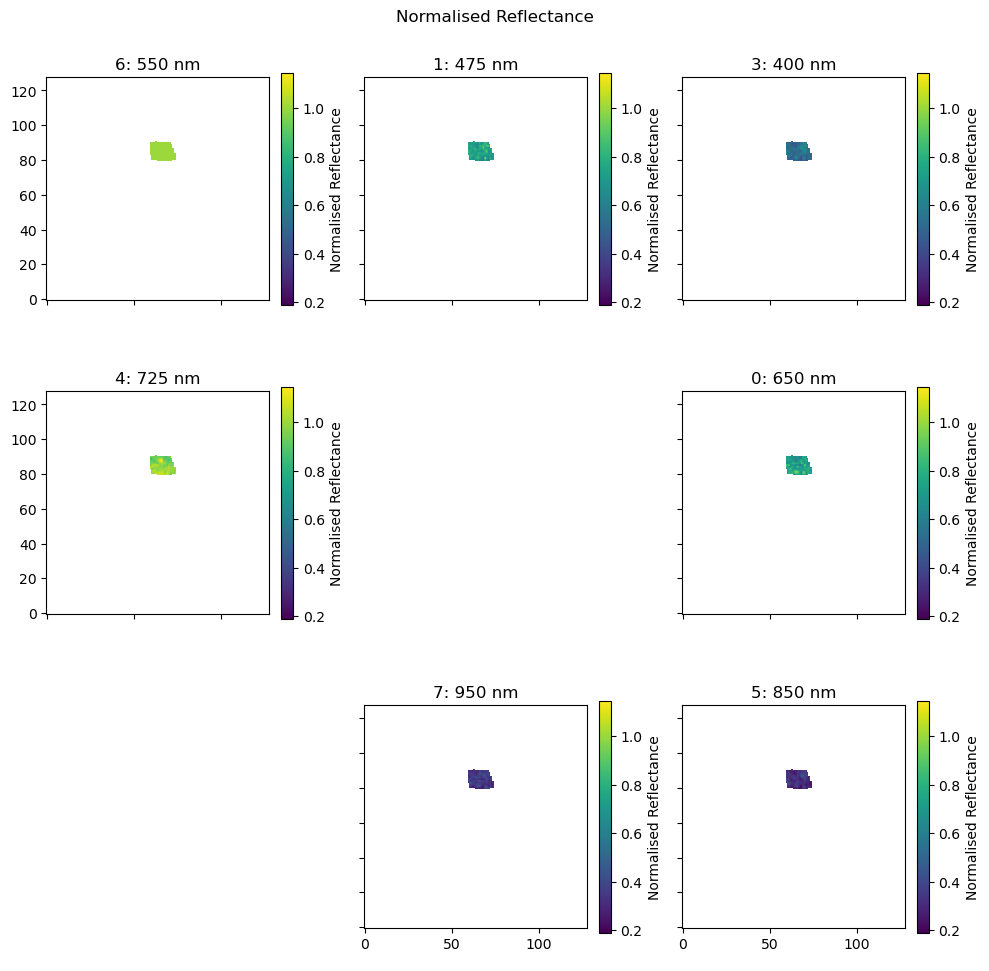

In [28]:
norm_refl = osp.normalise_reflectance(aligned_refl)

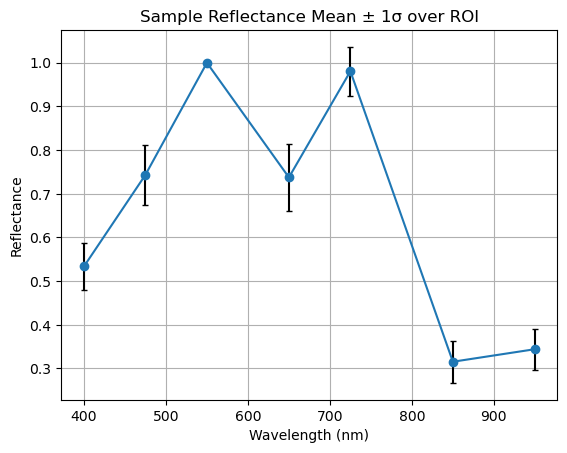

In [29]:
results = osp.plot_roi_reflectance(refl_imgs=norm_refl)